We import the data and add the columns names for easier manipulation and use


In [128]:
import numpy as np
import pandas as pd

# Import the datasets
df = pd.read_csv("/content/sample_data/housing.csv",header=None)
df.columns = ['CRIM','ZN', 'INDUS', 'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - percentage of lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

**Explore the Data**

In [129]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [130]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<ipython-input-131-6bedcae2976e>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


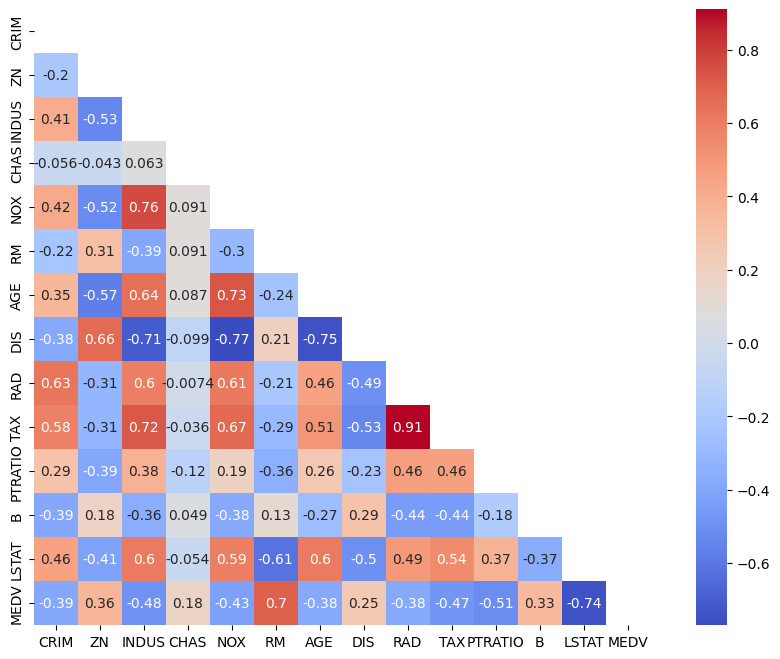

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a mask to hide the upper triangle of the matrix
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, square=True, ax=ax)
plt.show()


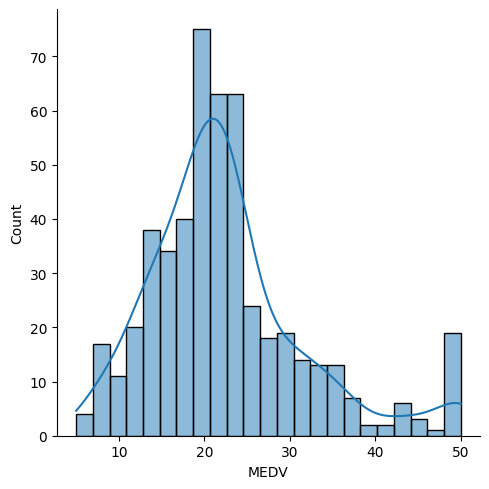

In [132]:
sns.displot(data=df["MEDV"],kde=True)
plt.show()

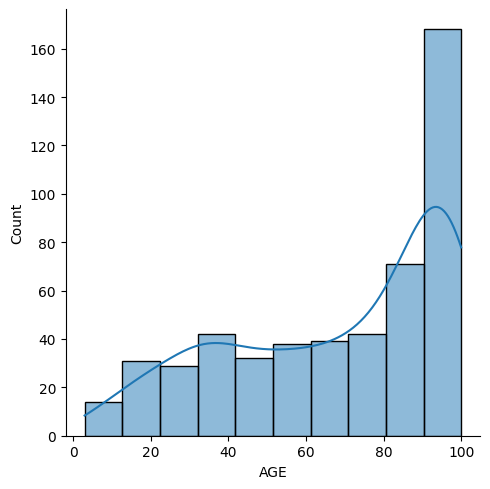

In [133]:
sns.displot(data=df["AGE"],kde=True)
plt.show()

Split the data into independent and dependent variables

In [134]:
#independent variables
X = df.drop('MEDV', axis=1).copy()
print(X)
print(X.shape)


#dependent variable
y = df['MEDV'].copy()
print(y)
print(y.shape)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

**Random forest for Regression**

Build Preliminary Model

In [135]:
!pip install rfpimp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [136]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

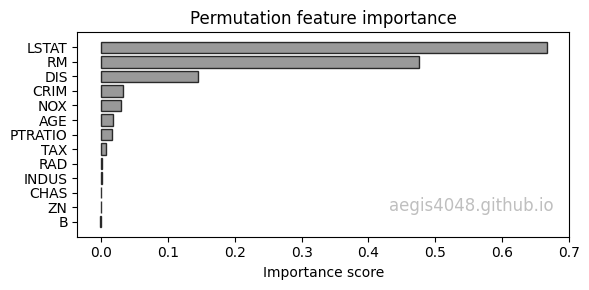

In [139]:
import rfpimp

imp = rfpimp.importances(rf, X_test, y_test)

fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

In [140]:
# Evaluate the performance of the random forest model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print("Mean squared error:", mse_1)
print("R-squared:", r2_1)

Mean squared error: 7.901513892156864
R-squared: 0.8922527442109116


Serch for the optimal number of trees for a better perofrmance 

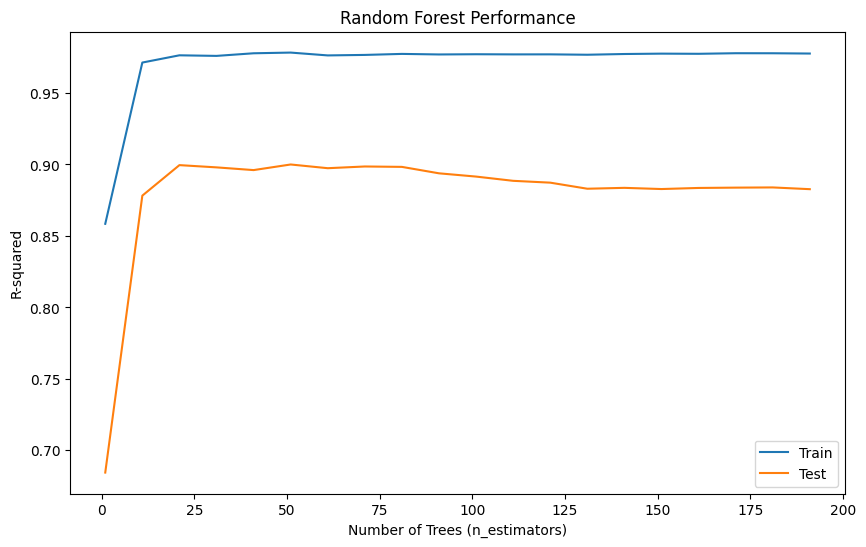

In [141]:
# Define a range of n_estimators values to try
n_estimators_range = np.arange(1, 201, 10)

# Train random forest models with different n_estimators values and evaluate their performance
train_scores = []
test_scores = []
for n_estimators in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

# Plot the training and testing scores as a function of n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label="Train")
plt.plot(n_estimators_range, test_scores, label="Test")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("R-squared")
plt.title("Random Forest Performance")
plt.legend()
plt.show()

The graph shows 52 is the number of estimators with the highest accuracy

In [142]:
# Train a random forest model
rf = RandomForestRegressor(n_estimators=52, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the performance of the random forest model

y_pred_RandomForest = rf.predict(X_test)
mse_RandomForest = mean_squared_error(y_test, y_pred_RandomForest)
r2_RandomForest = r2_score(y_test, y_pred_RandomForest)

print("Mean squared error:", mse_RandomForest)
print("R-squared:", r2_RandomForest)

Mean squared error: 7.311146449704144
R-squared: 0.9003031599539812


Linear Regression

Let us start by building bivarate linear regression model. We regress the independent variable Y (MEDV) on the independent variable LSTAT as it has the highest importance score.

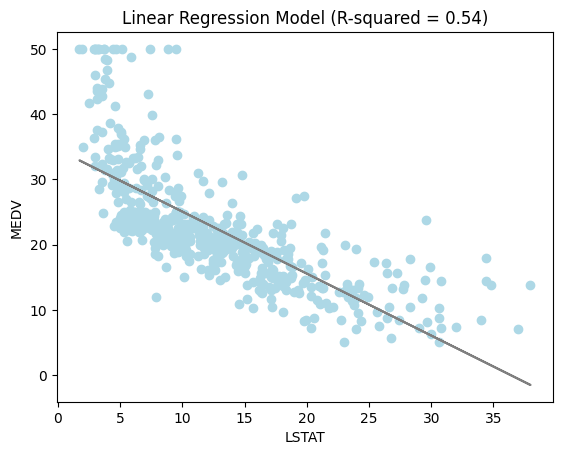

In [143]:
from sklearn import linear_model
from scipy.stats import linregress

indep = df['LSTAT'].values.reshape(-1,1)
dep = df['MEDV'].values

#We train
ols = linear_model.LinearRegression()
model = ols.fit(indep, dep)
response = model.predict(indep)

#We evaluate
r2 = model.score(indep, dep)

#We plot

# Create a scatter plot of the data points
plt.scatter(indep, dep, color='lightblue')

# Plot the line of the predicted values
plt.plot(indep, response, color='grey')

# Add the R-squared value to the plot title
plt.title(f"Linear Regression Model (R-squared = {r2:.2f})")

# Add labels for the x and y axes
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

# Display the plot
plt.show()





In [144]:
# Get the minimum and maximum values of the 'LSTAT' column
LSTAT_min = df['LSTAT'].min()
LSTAT_max = df['LSTAT'].max()

print(LSTAT_min)
print(LSTAT_max)


# Get the minimum and maximum values of the 'RM' column
RM_min = df['RM'].min()
RM_max = df['RM'].max()

print(RM_min)
print(RM_max)


1.73
37.97
3.561
8.78


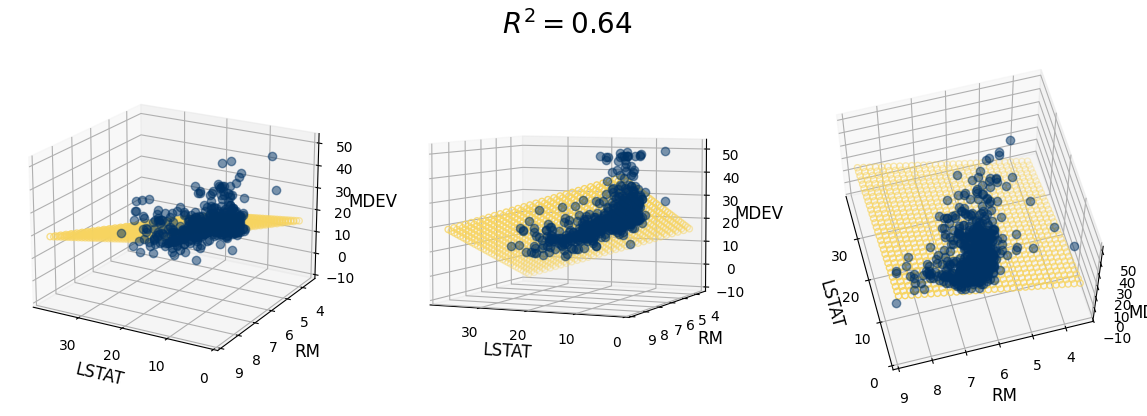

In [145]:
from mpl_toolkits.mplot3d import Axes3D

indep = df[['LSTAT', 'RM']].values.reshape(-1,2)
dep = df['MEDV']


#we prepare data for visualization

_x = indep[:, 0]
_y = indep[:, 1]
_z = dep

x_pred = np.linspace(LSTAT_min, LSTAT_max, 30) 
y_pred = np.linspace(RM_min, RM_max, 30)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#we train

ols = linear_model.LinearRegression()
model = ols.fit(indep, dep)
predicted = model.predict(model_viz)

#we evaluate
r2 = model.score(indep, dep)

#we plot

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(_x, _y, _z, color='#003366', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#f7d460')
    ax.set_xlabel('LSTAT', fontsize=12)
    ax.set_ylabel('RM', fontsize=12)
    ax.set_zlabel('MDEV', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=20, azim=120)
ax2.view_init(elev=5, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


In [146]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape)
print(y.shape)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the performance of the linear regression model
r2_2 = r2_score(y_test, y_pred)
mse_2 = mean_squared_error(y_test, y_pred)

print("Mean squared error:", mse_2)
print("R-squared:", r2_2)

(506, 13)
(506,)
Mean squared error: 24.291119474973478
R-squared: 0.6687594935356326


We can use one of the following techniques to improve our model's performance : 

- Scaling the features. *Scaler from scikit-learn like StandardScaler or MinMaxScaler.*

- We can create polynomial features from the original features to model non-linear relationships between the features and the target variable. *PolynomialFeatures transformer from scikit-learn to create polynomial features.*

- We can use regularization to prevent overfitting by adding a penalty term to the loss function. *Ridge and Lasso regression are examples of regularization techniques.*

In [147]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline
# Create a pipeline that scales the features, adds polynomial features, and fits a Ridge regression model
model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Ridge(alpha=0.1)
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model's performance on the training and testing data
print("Training R^2:", model.score(X_train, y_train))


r2_LinearRegression = model.score(X_test, y_test)
y_pred = model.predict(X_test)
mse_LinearRegression = np.mean((y_pred - y_test) ** 2)

print("R-squared:", r2_LinearRegression)
print("Mean squared error:", mse_LinearRegression)


Training R^2: 0.9403617143129352
R-squared: 0.8103244321709289
Mean squared error: 13.90962696198823


In [148]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "MSE before enhancements", "Final MSE", "R² before enhancements", "Final R²"]

table.add_row(["Random Forest Regression", mse_1,mse_RandomForest, r2_1,r2_RandomForest])
table.add_row(["Linear Regression", mse_2,mse_LinearRegression, r2_2,r2_LinearRegression])

print("Comparison of models\n")
print(table)

Comparison of models

+--------------------------+-------------------------+-------------------+------------------------+--------------------+
|          Model           | MSE before enhancements |     Final MSE     | R² before enhancements |      Final R²      |
+--------------------------+-------------------------+-------------------+------------------------+--------------------+
| Random Forest Regression |    7.901513892156864    | 7.311146449704144 |   0.8922527442109116   | 0.9003031599539812 |
|    Linear Regression     |    24.291119474973478   | 13.90962696198823 |   0.6687594935356326   | 0.8103244321709289 |
+--------------------------+-------------------------+-------------------+------------------------+--------------------+


In [ ]:
%%shell
jupyter nbconvert --to html //content/Housing_with_RF_and_LR.ipynb

[NbConvertApp] Converting notebook //content/Housing_with_RF_and_LR.ipynb to html
[NbConvertApp] Writing 834598 bytes to //content/Housing_with_RF_and_LR.html
